# Importing and Analyzing TSA Throughput data in Python

Hello! In this post I am going to show you how to get data from the TSA throughput website and analyze the results in Python. I came across this website on a webinar that was using the data to get some indication of a recovery from COVID-19. 

To start, let's import the python packages we need to do the analysis.

In [23]:
from bs4 import BeautifulSoup
import requests
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In order to retrieve the data, I am using the BeautifulSoup package to read the data table on the webiste. The following code is designed to import the contents of the webiste so that we can build a dataframe using Pandas.

In [2]:
source = requests.get('https://www.tsa.gov/coronavirus/passenger-throughput').text
soup = BeautifulSoup(source, 'lxml')

You'll need to have a basic understanding of HTML to understand the next step. Essentially, the data is stored in an HTML table and we can identify the rows based on the "tr" tag. We can pull every instance of the "tr" tag using the find_all method.

I then use a loop function to iterate through each row to create a series of nested lists based on a the new line charater 

In [3]:
row = soup.find_all("tr")

data = []
for i in row[1:]:
    string = i.get_text()
    a = string.split("\n")
    data.append(a)

print(data)

[['5/27/2020', '261,170', '2,269,035', ''], ['5/26/2020', '264,843', '2,453,649', ''], ['5/25/2020', '340,769', '2,512,237', ''], ['5/24/2020', '267,451', '2,070,716', ''], ['5/23/2020', '253,190', '2,124,825', ''], ['5/22/2020', '348,673', '2,792,670', ''], ['5/21/2020', '318,449', '2,673,635', ''], ['5/20/2020', '230,367', '2,472,123', ''], ['5/19/2020', '190,477', '2,312,727', ''], ['5/18/2020', '244,176', '2,615,691', ''], ['5/17/2020', '253,807', '2,620,276', ''], ['5/16/2020', '193,340', '2,091,116', ''], ['5/15/2020', '250,467', '2,664,549', ''], ['5/14/2020', '234,928', '2,611,324', ''], ['5/13/2020', '176,667', '2,343,675', ''], ['5/12/2020', '163,205', '2,191,387', ''], ['5/11/2020', '215,645', '2,512,315', ''], ['5/10/2020', '200,815', '2,419,114', ''], ['5/9/2020', '169,580', '1,985,942', ''], ['5/8/2020', '215,444', '2,602,631', ''], ['5/7/2020', '190,863', '2,555,342', ''], ['5/6/2020', '140,409', '2,270,662', ''], ['5/5/2020', '130,601', '2,106,597', ''], ['5/4/2020', '1

In [4]:
df = pd.DataFrame(data, columns=['Date','This Year','Last Year','Empty'])

In [5]:
print(df.dtypes)

Date         object
This Year    object
Last Year    object
Empty        object
dtype: object


Now that we've imported the data, you'll notice that the data types are objects. We need to convert that in order to manipulate and plot the date. 

For the numerical columns, we need to strip out the commas and convert it to a number.
For the dates, we just need to use the datetime package to turn it into a date

In [6]:
df['This Year'] = df['This Year'].replace(',','', regex=True)
df['Last Year'] = df['Last Year'].replace(',','', regex=True)
df['This Year'] = pd.to_numeric(df['This Year'])
df['Last Year'] = pd.to_numeric(df['Last Year'])
df['Date']= pd.to_datetime(df['Date'])

In [7]:
print(df.dtypes)

Date         datetime64[ns]
This Year           float64
Last Year           float64
Empty                object
dtype: object


That looks better! Now let's plot the data so we can make sense of the numbers.

<Figure size 432x288 with 0 Axes>

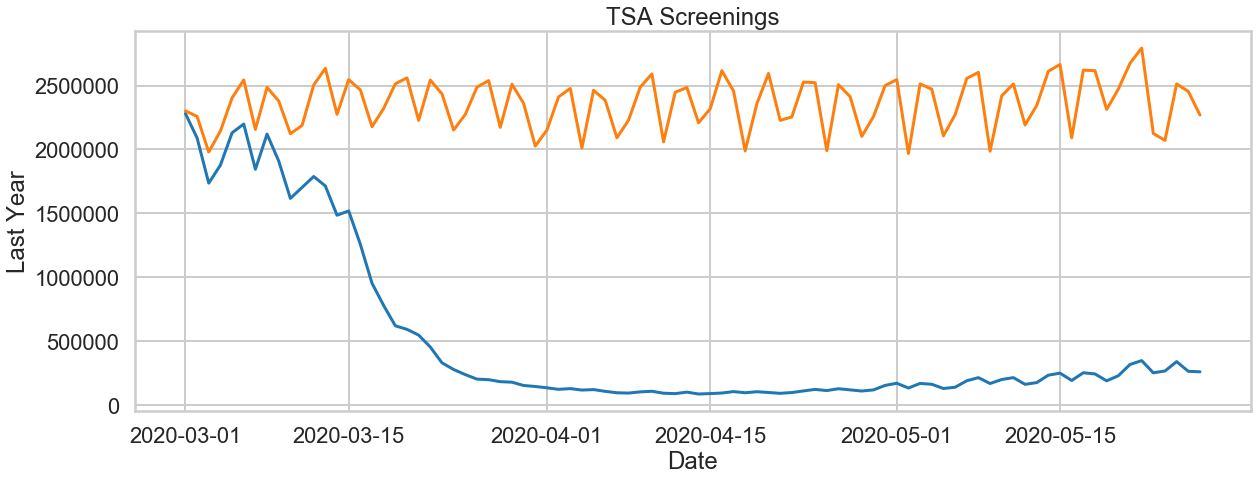

In [8]:
plt.clf()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,7))
ax.set_title('TSA Screenings')
#ax.set_yticks(range(0,3000000,3))
sns.lineplot(data = df, x = 'Date', y = 'This Year')
sns.lineplot(data = df, x = 'Date', y = 'Last Year')

plt.show()

In [9]:
plt.clf()
plt.plt('Date', 'This_Year')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'plt'

<Figure size 432x288 with 0 Axes>

In [11]:
df['Percent Change'] = df['This Year'] / df['Last Year'] -1

In [ ]:
print(df)

<Figure size 432x288 with 0 Axes>

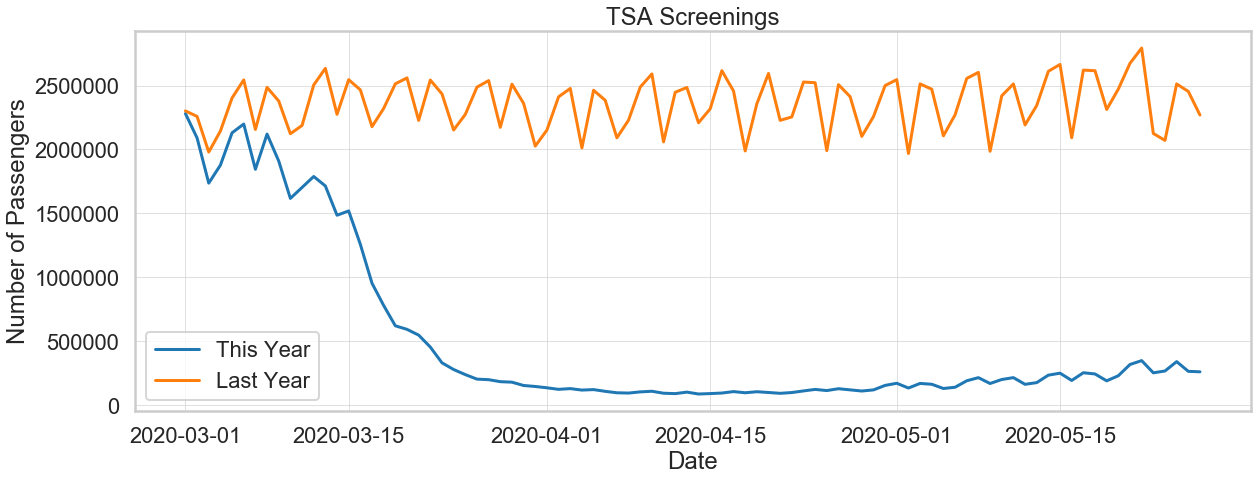

In [43]:
plt.clf()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 0.6})
f, ax = plt.subplots(figsize=(20,7))
sns.lineplot(data = df, x = 'Date', y= 'This Year')
sns.lineplot(data = df, x = 'Date', y= 'Last Year')

plt.ylabel('Number of Passengers')
plt.xlabel('Date')
plt.title('TSA Screenings')
plt.legend(['This Year','Last Year'])


plt.show()

<Figure size 432x288 with 0 Axes>

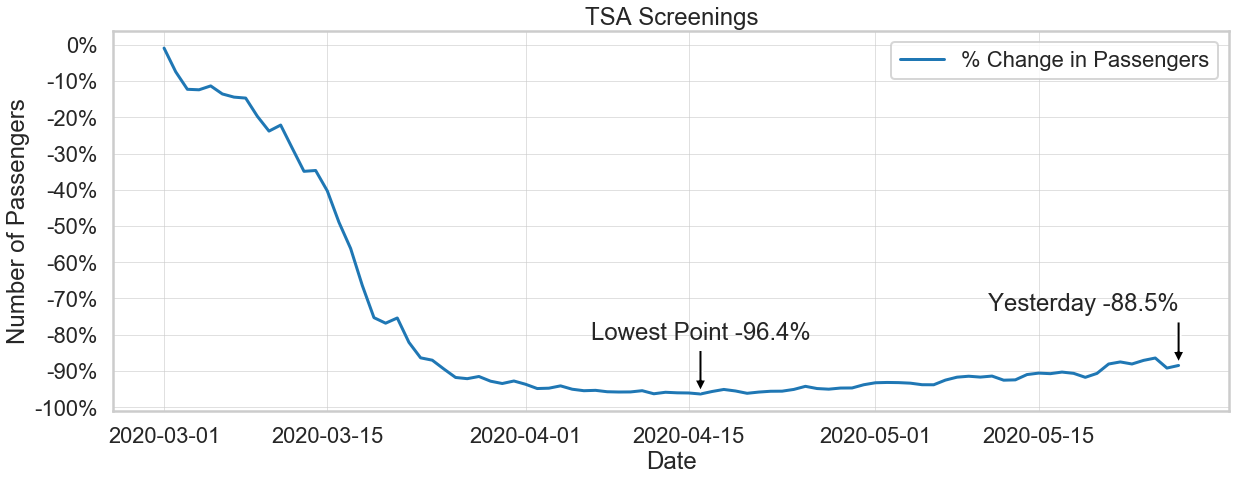

In [34]:
plt.clf()

sns.set_style("whitegrid")
#sns.set_context("poster", font_scale = .5)
f, ax = plt.subplots(figsize=(20,7))
sns.lineplot(data = df, x = 'Date', y= 'Percent Change')
plt.ylabel('Number of Passengers')
plt.xlabel('Date')
plt.title('TSA Screenings')
plt.legend(['% Change in Passengers'])
ax.set_yticks(sorted([ round(i,1) for i in np.arange(-1.0,0.1,.1)],reverse=True))
#ax.set_yticks([0, -0.10, -0.20, -0.30, -0.40, -0.5, -0.60, -0.70, -0.80, -0.90, -1])

ax.set_yticklabels(['0%','-10%','-20%', '-30%', '-40%','-50%','-60%','-70%', '-80%', '-90%', "-100%"])
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 0.6})

ymin = df['Percent Change'].min()
filt = df['Percent Change'] == df['Percent Change'].min()
xmin = df.loc[filt]['Date'].min()

yrecent = df.iloc[0,4]
xrecent = df.iloc[0,0]

#show the min value
ax.annotate('Lowest Point ' + str("{:.1f}".format(ymin*100))+"%", xy=(xmin, ymin), xytext=(xmin, ymin+.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top'
            #arrowprops=dict(facecolor='black', shrink=0.05),
            )

#show the most recent value
ax.annotate('Yesterday ' + str("{:.1f}".format(yrecent*100))+"%", xy=(xrecent, yrecent), xytext=(xrecent, yrecent+.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top'
            #arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show()

The last thing that I think would be interesting, is to combine all the data into one chart. The next example will show you how to plot multiple lines with two different Y axis.

<Figure size 432x288 with 0 Axes>

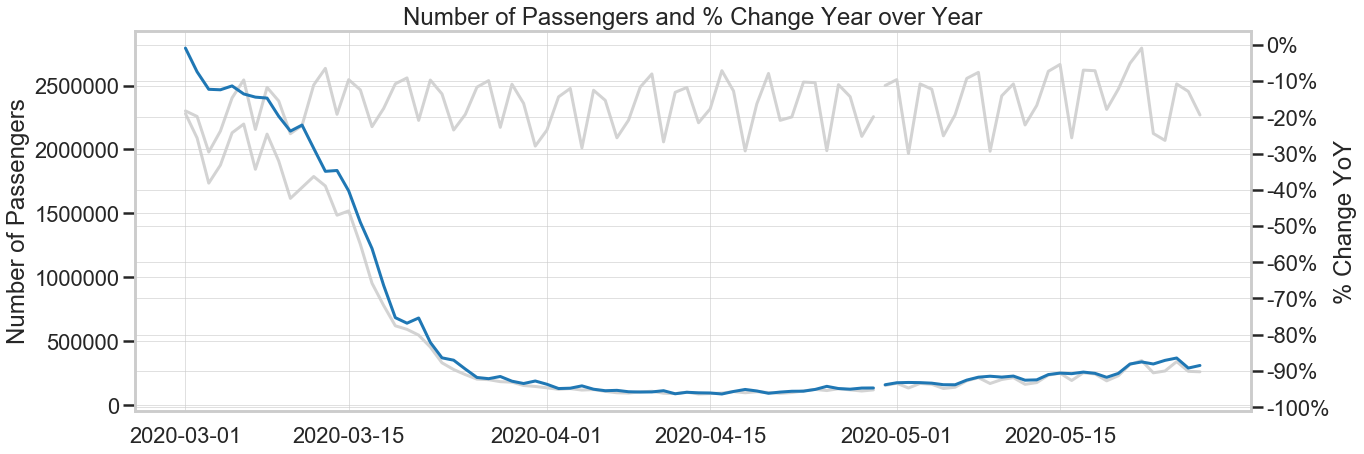

In [67]:
plt.clf()

x = df['Date']
y1 = df['Last Year']
y2 = df['This Year']
y3 = df['Percent Change']

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 0.6})

fig, ax1 = plt.subplots(figsize=(20,7))
ax1.plot(x, y1, color = '#D3D3D3')
ax1.plot(x, y2, color = '#D3D3D3')
ax1.set_ylabel('Number of Passengers')

ax1.set_title('Number of Passengers and % Change Year over Year')


ax2 = ax1.twinx()
ax2.plot(x, y3)
ax2.set_yticks(sorted([ round(i,1) for i in np.arange(-1.0,0.1,.1)],reverse=True))
ax2.set_yticklabels(['0%','-10%','-20%', '-30%', '-40%','-50%','-60%','-70%', '-80%', '-90%', "-100%"])
ax2.set_ylabel('% Change YoY')

plt.show()

Looking at the combined graph, it doesn't seem to add much value because the % Change line and the Number of passengers last year are overlapping. The best view is likely to have the first and second graph on top of each other. Here's how to do that: